# Create total power data base

Create total power version of data base for Bunyo

## import libraries

In [1]:
from importlib import reload
import matplotlib.pyplot as plt
from astropy.table import Table, join, vstack
import numpy as np

In [2]:
import large_cubes

In [3]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/large_cubes.py'>

In [4]:
import wsu_db

## import data

In [5]:
result2019 = Table.read('data/result_table_cycle7_with_calc_values_20220923.csv')

In [6]:
len(result2019)

51368

In [7]:
result2019.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

In [8]:
idx = result2019['array'] == 'TP'
result2019[idx]['member_ous_uid','array','spw_freq','spw_specwidth','spw_nchan','s_resolution','is_mosaic']

member_ous_uid,array,spw_freq,spw_specwidth,spw_nchan,s_resolution,is_mosaic
str22,str3,float64,float64,float64,float64,str1
uid://A001/X14c3/X61b,TP,244.8958420797094,31375.263260995456,128.0,24.42088292236162,F
uid://A001/X14c3/X61b,TP,230.10470525373535,972.2806791278714,4096.0,24.42088292236162,F
uid://A001/X14c3/X61b,TP,231.9745826082978,31115.078538066395,128.0,24.42088292236162,F
uid://A001/X14c3/X61b,TP,246.7856649655297,31374.285241760404,128.0,24.42088292236162,F
uid://A001/X14c3/X615,TP,112.39773136835102,31526.326439925368,128.0,55.143705793363374,F
uid://A001/X14c3/X615,TP,109.99943631422802,490.4794677676596,4096.0,55.143705793363374,F
...,...,...,...,...,...,...
uid://A001/X14c2/X9a,TP,232.35379132821924,31380.35414479961,128.0,25.74028822308344,F
uid://A001/X14c2/X9a,TP,220.43116887696064,563.1110468263852,2048.0,25.74028822308344,F


In [9]:
result2021 = Table.read('data/result_table_cycle8_with_calc_values_20220923.csv')

In [10]:
len(result2021)

50107

In [11]:
# tp dump time
tp_dump_time = Table.read('data/science_tp_schedblocks_params_from_bunyo.csv',encoding='utf-8-sig')

In [12]:
tp_dump_time

OBSPROJECT_UID,SB_UID,SB_NAME,STANDARD_MODE,MODE_NAME,ARRAY,ESTIMATED_EXECUTION_TIME_PRJ,ESTIMATED_EXECUTION_TIME_PRJ_UNIT,REPRESENTATIVE_FREQUENCY,REPRESENTATIVE_FREQUENCY_UNIT,REQUIRED_RECIEVER_BANDS,REPRESENTATIVE_TARGET_REF,PRJ_CODE,CYCLE,EXECOUNT,SB_STATE,TARGET_ID,SPEC_REF,FIELD_REF,OBSERVING_PARAMETER_REF,SCIPARAM_NAME,SCIPARAM_REPRESENTATIVE_BANDWIDTH,SCIPARAM_REPRESENTATIVE_BANDWIDTH_UNIT,SCIPARAM_REPRESENTATIVE_FREQUENCY,SCIPARAM_REPRESENTATIVE_FREQUENCY_UNIT,SCIPARAM_SENSITIVITY_GOAL,SCIPARAM_SENSITIVITY_GOAL_UNIT,SCIPARAM_INTEGRATION_TIME,SCIPARAM_INTEGRATION_TIME_UNIT,SCIPARAM_SUB_SCAN_DURATION,SCIPARAM_SUB_SCAN_DURATION_UNIT,ACASPEC_INTEGRATION_DURATION,ACASPEC_INTEGRATION_DURATION_UNIT,ACASPEC_CHANNEL_AVERAGE_DURATION,ACASPEC_CHANNEL_AVERAGE_DURATION_UNIT,ACASPEC_ENABLE_180_DEGREE_WALSH_FUNCTION,ACASPEC_ENABLE_90_DEGREE_WALSH_FUNCTION,SUB_SCAN_DURATION (s),INTEGRATION_DURATION (s),Samples
str22,str23,str33,str4,str20,str8,float64,str3,float64,str3,str28,str11,str14,str6,int64,str17,str11,str11,str11,str11,str37,float64,str3,float64,str3,float64,str3,float64,str3,float64,str1,float64,str2,float64,str2,str5,str5,float64,float64,int64
uid://A001/Xa0/X1258,uid://A002/X758152/X42,VV219_Science_TP_B3,true,Standard Single Dish,TP-Array,4.5,h,114.4199784,GHz,['ALMA_RB_03'],X1162338469,2012.1.00759.S,2012.1,3,ObservingTimedOut,X1162338469,X1447303509,X1950970087,X2056880778,Science Params,1.92,MHz,114.4199784,GHz,8.565950103,mJy,4.3368,min,20.016,s,0.144,s,0.144,s,false,false,20.016,0.144,139
uid://A001/Xa0/X1258,uid://A002/X758152/X46,VV219_Science_TP_B7,true,Standard Single Dish,TP-Array,4.5,h,343.2424494,GHz,"['ALMA_RB_07', 'ALMA_RB_06']",X1858323719,2012.1.00759.S,2012.1,3,ObservingTimedOut,X1858323719,X1775317541,X671993200,X867108706,Science Params,4.66,MHz,343.2424494,GHz,15.41713934,mJy,1.512,min,10.08,s,0.144,s,0.144,s,false,false,10.08,0.144,70
uid://A001/Xa0/X1258,uid://A002/X758152/X4a,VV219_D1_Science_TP,true,Standard Single Dish,TP-Array,4.5,h,343.2424494,GHz,"['ALMA_RB_07', 'ALMA_RB_06']",X1902151533,2012.1.00759.S,2012.1,3,ObservingTimedOut,X1902151533,X1777740274,X1008170695,X863167740,Science Params,5.724667853,MHz,343.2424494,GHz,15.41713934,mJy,1.68,min,10.08,s,0.144,s,0.144,s,false,false,10.08,0.144,70
uid://A001/Xa0/Xf3f,uid://A002/X95bb93/X2,M74_c_06_TP,true,Standard Single Dish,TP-Array,1.5625,d,230.0348593,GHz,['ALMA_RB_06'],X1099822116,2012.1.00650.S,2012.1,25,FullyObserved,X1099822116,X1661884626,X747151669,X1313177120,Science Params,1.531278126,MHz,230.0348593,GHz,8.617898961,mJy,967.58,s,15.12,s,0.24,s,240.0,ms,false,false,15.12,0.24,63
uid://A001/Xa0/Xf3f,uid://A002/X95bb93/X2,M74_c_06_TP,true,Standard Single Dish,TP-Array,1.5625,d,230.0348593,GHz,['ALMA_RB_06'],X1099822116,2012.1.00650.S,2012.1,25,FullyObserved,X1099822116,X1661884626,X747151669,X1313177120,Science Params,1.531278126,MHz,230.0348593,GHz,8.617898961,mJy,967.58,s,15.12,s,0.24,s,240.0,ms,false,false,15.12,0.24,63
uid://A001/Xa0/Xf3f,uid://A002/X95bb93/X2,M74_c_06_TP,true,Standard Single Dish,TP-Array,1.5625,d,230.0348593,GHz,['ALMA_RB_06'],X1099822116,2012.1.00650.S,2012.1,25,FullyObserved,X1099822116,X1661884626,X747151669,X1313177120,Science Params,1.531278126,MHz,230.0348593,GHz,8.617898961,mJy,967.58,s,15.12,s,0.24,s,240.0,ms,false,false,15.12,0.24,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uid://A001/X335e/X10e,uid://A001/X3571/X125,Sun_10_c_06_TP,true,Solar Single Dish,TP-Array,2.283333333,h,248.0,GHz,['ALMA_RB_06'],X911661108,2022.A.00001.S,2022.A,5,Waiting,X911661108,X398084563,X985528751,X2131317530,Science parameters (full disc),7.5,GHz,248.0,GHz,1938.444474,mJy,200.0,s,15.12,s,1.008,s,1008.0,ms,false,false,15.12,1.008,15
uid://A001/X335e/X10e,uid://A001/X3571/X125,Sun_10_c_06_TP,true,Solar Single Dish,TP-Array,2.283333333,h,248.0,GHz,['ALMA_RB_06'],X911661108,2022.A.00001.S,2022.A,5,Waiting,X911661

In [13]:
tp_dump_time.columns

<TableColumns names=('OBSPROJECT_UID','SB_UID','SB_NAME','STANDARD_MODE','MODE_NAME','ARRAY','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','REPRESENTATIVE_FREQUENCY','REPRESENTATIVE_FREQUENCY_UNIT','REQUIRED_RECIEVER_BANDS','REPRESENTATIVE_TARGET_REF','PRJ_CODE','CYCLE','EXECOUNT','SB_STATE','TARGET_ID','SPEC_REF','FIELD_REF','OBSERVING_PARAMETER_REF','SCIPARAM_NAME','SCIPARAM_REPRESENTATIVE_BANDWIDTH','SCIPARAM_REPRESENTATIVE_BANDWIDTH_UNIT','SCIPARAM_REPRESENTATIVE_FREQUENCY','SCIPARAM_REPRESENTATIVE_FREQUENCY_UNIT','SCIPARAM_SENSITIVITY_GOAL','SCIPARAM_SENSITIVITY_GOAL_UNIT','SCIPARAM_INTEGRATION_TIME','SCIPARAM_INTEGRATION_TIME_UNIT','SCIPARAM_SUB_SCAN_DURATION','SCIPARAM_SUB_SCAN_DURATION_UNIT','ACASPEC_INTEGRATION_DURATION','ACASPEC_INTEGRATION_DURATION_UNIT','ACASPEC_CHANNEL_AVERAGE_DURATION','ACASPEC_CHANNEL_AVERAGE_DURATION_UNIT','ACASPEC_ENABLE_180_DEGREE_WALSH_FUNCTION','ACASPEC_ENABLE_90_DEGREE_WALSH_FUNCTION','SUB_SCAN_DURATION (s)','INTEGRATION_DURATI

## munge TP data

probably should double-check some of the values, particularly imsize. easiest route might to be not deliver them.

In [15]:
reload(wsu_db)
result2019_tp = wsu_db.create_tp_database(result2019)

In [16]:
len(result2019_tp)

447

In [17]:
result2019_tp

mous,proposal_id,schedblock_name,array,science_keyword,scientific_category,band,ntarget,target_name,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_4x,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_nchan_spw_stepped2,wsu_nchan_agg_stepped2_early,wsu_nchan_agg_stepped2_later_4x,wsu_frac_bw_early,wsu_frac_bw_later_4x,wsu_frac_bw_spw
,,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,,,kHz,,km / s,,,,,,
str22,str14,str18,str3,str105,str27,int64,float64,str29,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
uid://A001/X1465/X1004,2019.1.01326.S,Position_i_03_TP,TP,"Outflows, jets, feedback, Galactic centres/nuclei",Active galaxies,3,2.0,Position_8,0.01746660497991503,62.87974867219725,F,10.0,0.0,12.575949734439451,2,4,965.2369862129896,92.45000352385364,2.977997071370687,14336.0,4096.0,2.0,8.0,92.45000352385364,2,16.0,32.0,2.0,8,16,607.5,45.0,1.969971998843775,3292.0,26336.0,52672.0,0.1730665158479062,0.3461330316958124,0.021633314480988274
uid://A001/X1465/X1004,2019.1.01326.S,Position_i_03_TP,TP,"Outflows, jets, feedback, Galactic centres/nuclei",Active galaxies,3,2.0,Position_8_OFF_0,0.017466475160180468,62.879291027141825,F,10.0,0.0,12.575858205428364,2,4,965.2440815398124,92.45068762960969,2.9779970713706874,14336.0,4096.0,2.0,8.0,92.45068762960969,2,16.0,32.0,2.0,8,16,607.5,45.0,1.9699574216760087,3292.0,26336.0,52672.0,0.17306523521059883,0.34613047042119766,0.021633154401324853
uid://A001/X1465/X100a,2019.1.01326.S,Position_j_03_TP,TP,"Outflows, jets, feedback, Galactic centres/nuclei",Active galaxies,3,2.0,Position_2,0.016034756409375246,57.725123073750886,F,10.0,0.0,11.545024614750178,2,4,1116.951125568381,100.949449109937,3.1672797407443896,8192.0,2048.0,2.0,8.0,100.949449109937,2,16.0,32.0,2.0,8,16,661.5,49.0,1.9644754153242723,3023.0,24184.0,48368.0,0.15849516902836702,0.31699033805673404,0.019811896128545878
uid://A001/X1465/X100a,2019.1.01326.S,Position_j_03_TP,TP,"Outflows, jets, feedback, Galactic centres/nuclei",Active galaxies,3,2.0,Position_2_OFF_0,0.016034618483757104,57.72462654152557,F,10.0,0.0,11.544925308305114,2,4,1116.9607332914827,100.95031745084475,3.1672797407443896,8192.0,2048.0,2.0,8.0,100.95031745084475,2,16.0,32.0,2.0,8,16,661.5,49.0,1.9644585175629925,3023.0,24184.0,48368.0,0.15849380570586916,0.3169876114117383,0.019811725713233645
uid://A001/X1465/X1010,2019.1.01326.S,Position_k_03_TP,TP,"Outflows, jets, feedback, Galactic centres/nuclei",Active galaxies,3,2.0,Position_3,0.01603475618782238,57.72512227616057,F,10.0,0.0,11.545024455232113,2,4,1116.9514798209739,100.9494499054753,3.1672806946595498,8192.0,2048.0,2.0,8.0,100.9494499054753,2,16.0,32.0,2.0,8,16,661.5,49.0,1.9644753998431037,3023.0,24184.0,48368.0,0.15849516777933617,0.31699033555867234,0.01981189597241702
uid://A001/X1465/X1010,2019.1.01326.S,Position_k_03_TP,TP,"Outflows, jets, feedback, Galactic centres/nuclei",Active galaxies,3,2.0,Position_3_OFF_0,0.016034610164500713,57.724596592202566,F,10.0,0.0,11.544919318440513,2,4,1116.9616516283045,100.9503692277316,3.1672806946595498,8192.0,2048.0,2.0,8.0,100.9503692277316,2,16.0,32.0,2.0,8,16,661.5,49.0,1.9644575100030683,3023.0,24184.0,48368.0,0.15849372441527154,0.3169874488305431,0.019811715551908943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uid://A001/X14d8/X499,2019.2.00096.S,IC443_k_06_TP,TP,Inter-Stellar Medium (ISM)/Molecular clouds,ISM and star formation,6,2.0,IC443,0.007172222625573374,25.819990177803014,F,10.0,0.0,

imsize is definitely wrong. For example, uid://A001/X1465/X1004.	The SD pipeline has it as 78,76, which is much larger than given here.

In [18]:
result2019_tp.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw')>

In [19]:
idx = result2019_tp['ntarget'] > 3
result2019_tp[idx]['mous','ntarget','target_name']

mous,ntarget,target_name
str22,float64,str29
uid://A001/X1465/X1ffd,10.0,Ridge-N1
uid://A001/X1465/X1ffd,10.0,Ridge-N1_OFF_0
uid://A001/X1465/X1ffd,10.0,Ridge-N2
uid://A001/X1465/X1ffd,10.0,Ridge-N2_OFF_0
uid://A001/X1465/X1ffd,10.0,Ridge-N3
uid://A001/X1465/X1ffd,10.0,Ridge-N3_OFF_0
...,...,...
uid://A001/X14d7/Xbe,8.0,G328.25-0.53_A_OFF_0
uid://A001/X14d7/Xbe,8.0,G333.46-0.16_A


looks like the offs are a separate source.

Checking on the re-calculated velocities.

In [23]:
result2019_tp.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw')>

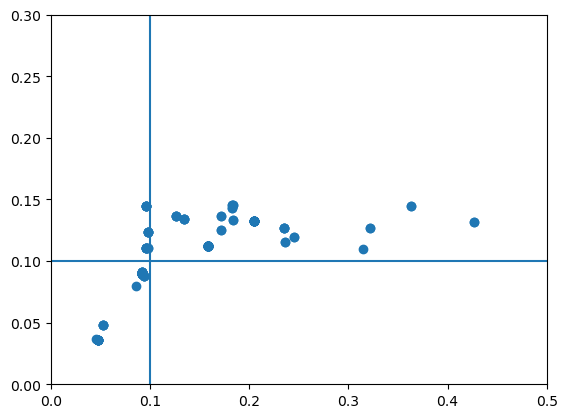

In [29]:
plt.scatter(result2019_tp['blc_velres'],result2019_tp['wsu_velres_stepped2'])
plt.xlim(0,0.5)
plt.ylim(0,0.3)
plt.axvline(0.1)
plt.axhline(0.1)

In [20]:
reload(wsu_db)
result2021_tp = wsu_db.create_tp_database(result2021)

In [21]:
len(result2021_tp)

515

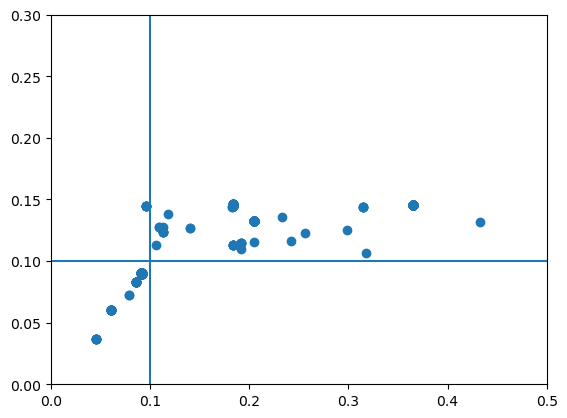

In [30]:
plt.scatter(result2021_tp['blc_velres'],result2021_tp['wsu_velres_stepped2'])
plt.xlim(0,0.5)
plt.ylim(0,0.3)
plt.axvline(0.1)
plt.axhline(0.1)

In [31]:
result2019_tp.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw')>

## munge dump time data base

In [32]:
tp_dump_time.columns

<TableColumns names=('OBSPROJECT_UID','SB_UID','SB_NAME','STANDARD_MODE','MODE_NAME','ARRAY','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','REPRESENTATIVE_FREQUENCY','REPRESENTATIVE_FREQUENCY_UNIT','REQUIRED_RECIEVER_BANDS','REPRESENTATIVE_TARGET_REF','PRJ_CODE','CYCLE','EXECOUNT','SB_STATE','TARGET_ID','SPEC_REF','FIELD_REF','OBSERVING_PARAMETER_REF','SCIPARAM_NAME','SCIPARAM_REPRESENTATIVE_BANDWIDTH','SCIPARAM_REPRESENTATIVE_BANDWIDTH_UNIT','SCIPARAM_REPRESENTATIVE_FREQUENCY','SCIPARAM_REPRESENTATIVE_FREQUENCY_UNIT','SCIPARAM_SENSITIVITY_GOAL','SCIPARAM_SENSITIVITY_GOAL_UNIT','SCIPARAM_INTEGRATION_TIME','SCIPARAM_INTEGRATION_TIME_UNIT','SCIPARAM_SUB_SCAN_DURATION','SCIPARAM_SUB_SCAN_DURATION_UNIT','ACASPEC_INTEGRATION_DURATION','ACASPEC_INTEGRATION_DURATION_UNIT','ACASPEC_CHANNEL_AVERAGE_DURATION','ACASPEC_CHANNEL_AVERAGE_DURATION_UNIT','ACASPEC_ENABLE_180_DEGREE_WALSH_FUNCTION','ACASPEC_ENABLE_90_DEGREE_WALSH_FUNCTION','SUB_SCAN_DURATION (s)','INTEGRATION_DURATI

In [33]:
reload(wsu_db)
tp_dump_time_sb = wsu_db.aggregate_tdump_db(tp_dump_time)

## add dump time

In [34]:
tp_dump_time_sb.columns

<TableColumns names=('proposal_id','schedblock_name','CYCLE','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','ACASPEC_INTEGRATION_DURATION','EXECOUNT','N_TDUMP')>

In [35]:
result2019_tp_dump = join(result2019_tp,tp_dump_time_sb,join_type='left')

In [36]:
result2019_tp_dump.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw','CYCLE','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','ACASPEC_INTEGRATION_DURATION','EXECOUNT','N_TDUMP')>

In [37]:
len(result2019_tp_dump)

447

In [38]:
len(result2019_tp)

447

In [39]:
result2019_tp_dump.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw','CYCLE','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','ACASPEC_INTEGRATION_DURATION','EXECOUNT','N_TDUMP')>

In [40]:
result2019_tp_dump['mous','proposal_id','ACASPEC_INTEGRATION_DURATION','N_TDUMP']

mous,proposal_id,ACASPEC_INTEGRATION_DURATION,N_TDUMP
str22,str14,float64,int64
uid://A001/X1465/X346b,2019.1.00263.S,0.512,1
uid://A001/X1465/X346b,2019.1.00263.S,0.512,1
uid://A001/X1465/X2bd0,2019.1.00558.S,0.4,1
uid://A001/X1465/X2bd0,2019.1.00558.S,0.4,1
uid://A001/X1465/X296b,2019.1.00639.S,0.64,1
uid://A001/X1465/X296b,2019.1.00639.S,0.64,1
...,...,...,...
uid://A001/X14c3/Xa31,2019.2.00232.S,0.368,1
uid://A001/X14c3/Xa37,2019.2.00232.S,0.336,1


In [41]:
idx = result2019_tp_dump['N_TDUMP'] > 1
result2019_tp_dump[idx]['mous','proposal_id','ACASPEC_INTEGRATION_DURATION','N_TDUMP']

mous,proposal_id,ACASPEC_INTEGRATION_DURATION,N_TDUMP
str22,str14,float64,int64


In [42]:
result2021_tp_dump = join(result2021_tp,tp_dump_time_sb,join_type='left')

In [43]:
len(result2021_tp)

515

In [44]:
len(result2021_tp_dump)

515

In [45]:
result2021_tp_dump.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw','CYCLE','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','ACASPEC_INTEGRATION_DURATION','EXECOUNT','N_TDUMP')>

In [46]:
result2019_tp_dump['mous','proposal_id','ACASPEC_INTEGRATION_DURATION','N_TDUMP']

mous,proposal_id,ACASPEC_INTEGRATION_DURATION,N_TDUMP
str22,str14,float64,int64
uid://A001/X1465/X346b,2019.1.00263.S,0.512,1
uid://A001/X1465/X346b,2019.1.00263.S,0.512,1
uid://A001/X1465/X2bd0,2019.1.00558.S,0.4,1
uid://A001/X1465/X2bd0,2019.1.00558.S,0.4,1
uid://A001/X1465/X296b,2019.1.00639.S,0.64,1
uid://A001/X1465/X296b,2019.1.00639.S,0.64,1
...,...,...,...
uid://A001/X14c3/Xa31,2019.2.00232.S,0.368,1
uid://A001/X14c3/Xa37,2019.2.00232.S,0.336,1


In [47]:
idx = result2021_tp_dump['N_TDUMP'] > 1
result2021_tp_dump[idx]['mous','proposal_id','ACASPEC_INTEGRATION_DURATION','N_TDUMP']

mous,proposal_id,ACASPEC_INTEGRATION_DURATION,N_TDUMP
str22,str14,float64,int64


In [61]:
result2019_tp_dump.write('data/tp_database_cycle7_persrc_20231214.ecsv',overwrite=True)

In [62]:
result2021_tp_dump.write('data/tp_database_cycle8_persrc_20231214.ecsv',overwrite=True)

In [63]:
result_tp_dump = vstack([result2019_tp_dump,result2021_tp_dump])

In [64]:
result_tp_dump.write('data/tp_database_cycle7_cycle8_permous_20231214.ecsv',overwrite=True)

## aggregating per mous

In [65]:
result2019_tp_dump_mous = wsu_db.create_per_mous_db(result2019_tp_dump)

Taking first value. Key aggregation not specified: mous
Taking first value. Key aggregation not specified: proposal_id
Taking first value. Key aggregation not specified: schedblock_name
Taking first value. Key aggregation not specified: array
Taking first value. Key aggregation not specified: science_keyword
Taking first value. Key aggregation not specified: scientific_category
Taking first value. Key aggregation not specified: band
Taking first value. Key aggregation not specified: ntarget
Taking first value. Key aggregation not specified: target_name
Taking first value. Key aggregation not specified: mosaic
Taking first value. Key aggregation not specified: blc_npol
Taking first value. Key aggregation not specified: blc_nspw
Taking first value. Key aggregation not specified: blc_nchan_agg
Taking first value. Key aggregation not specified: blc_nchan_max
Taking first value. Key aggregation not specified: blc_bandwidth_max
Taking first value. Key aggregation not specified: blc_bandwidth

In [66]:
len(result2019_tp_dump_mous)

210

In [67]:
result2021_tp_dump_mous = wsu_db.create_per_mous_db(result2021_tp_dump)

Taking first value. Key aggregation not specified: mous
Taking first value. Key aggregation not specified: proposal_id
Taking first value. Key aggregation not specified: schedblock_name
Taking first value. Key aggregation not specified: array
Taking first value. Key aggregation not specified: science_keyword
Taking first value. Key aggregation not specified: scientific_category
Taking first value. Key aggregation not specified: band
Taking first value. Key aggregation not specified: ntarget
Taking first value. Key aggregation not specified: target_name
Taking first value. Key aggregation not specified: mosaic
Taking first value. Key aggregation not specified: blc_npol
Taking first value. Key aggregation not specified: blc_nspw
Taking first value. Key aggregation not specified: blc_nchan_agg
Taking first value. Key aggregation not specified: blc_nchan_max
Taking first value. Key aggregation not specified: blc_bandwidth_max
Taking first value. Key aggregation not specified: blc_bandwidth

In [68]:
result2019_tp_dump_mous.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw','CYCLE','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','ACASPEC_INTEGRATION_DURATION','EXECOUNT','N_TDUMP')>

In [69]:
result_tp_dump_mous = vstack([result2019_tp_dump_mous,result2021_tp_dump_mous])

In [70]:
result2019_tp_dump_mous.write('data/tp_database_cycle7_permous_20231214.ecsv',overwrite=True)

In [71]:
result2021_tp_dump_mous.write('data/tp_database_cycle8_permous_20231214.ecsv',overwrite=True)

In [72]:
result_tp_dump_mous.write('data/tp_database_cycle7_cycle8_permous_20231214.ecsv',overwrite=True)

## looking at estimated execution time

In [60]:
result_tp_dump_mous['proposal_id','mous','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','EXECOUNT']

proposal_id,mous,ESTIMATED_EXECUTION_TIME_PRJ,ESTIMATED_EXECUTION_TIME_PRJ_UNIT,EXECOUNT
str14,str22,float64,str3,int64
2019.1.01326.S,uid://A001/X1465/X1004,1.722933333,h,2
2019.1.01326.S,uid://A001/X1465/X100a,1.163124444,h,1
2019.1.01326.S,uid://A001/X1465/X1010,1.163124444,h,1
2019.1.01326.S,uid://A001/X1465/X1016,1.163124444,h,1
2019.1.01326.S,uid://A001/X1465/X101c,1.163124444,h,1
2019.1.01326.S,uid://A001/X1465/X1022,1.163124444,h,1
...,...,...,...,...
2021.2.00140.S,uid://A001/X15aa/X2b8,14.67155556,h,11
2021.2.00175.S,uid://A001/X15b4/X18,1.149977778,h,1


These look consistent with mous times from a few checks.